In [3]:
def delete_keys(d):
        del_k = [k for k in d if len(d[k]) != 2]
        for k in del_k: del d[k] 

In [1]:
"""Accessing and interacting with Record files"""
# imports
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import glob
import os
import csv

class Record():
    """Class for interacting with record files"""

    def __init__(self, record_name: str) -> None:
        """Initialzes the record class"""
        self.record_name = record_name
        self.uc = {} 
        self.dec = {}
        self.acc = {}
        self.tc = {}
        self.bc = {}
        self._signalDf = pd.read_csv(f'../../data/database/signals/{record_name}.csv', na_values=['0.0'])

        # Call to get annotations
        self.__getannotations(self.record_name)

        # call to static method to create uc_dict
    


    def __getannotations(self, record_name) -> None:
        """Gets the annotations from the annotation csv file
        and populates the appropriate annotation list"""

        with open(f'../../data/annotations/csv/annotation_{record_name}.csv', newline='',
        encoding='UTF-8') as csvfile:
            annreader = csv.reader(csvfile, delimiter=',')
            for i, row in enumerate(annreader):
                joined_row = ''.join(row)
                if 'UC' in joined_row:
                    if joined_row[0] == '(':
                        self.uc[joined_row[1:]] = [i]
                    if joined_row[0] == ')' and joined_row[1:] in self.uc.keys():
                        self.uc[joined_row[1:]].append(i)
                    
    
                if 'DEC' in joined_row:
                    if joined_row[0] == '(':
                        self.dec[joined_row[1:]] = [i]
                    if joined_row[0] == ')' and joined_row[1:] in self.dec.keys():
                        self.dec[joined_row[1:]].append(i)
                if 'ACC' in joined_row:
                    if joined_row[0] == '(':
                        self.acc[joined_row[1:]] = [i]
                    if joined_row[0] == ')' and joined_row[1:] in self.acc.keys():
                        self.acc[joined_row[1:]].append(i)
                if 'TC' in joined_row:
                    if joined_row[0] == '(':
                        self.tc[joined_row[1:]] = [i]
                    if joined_row[0] == ')' and joined_row[1:] in self.tc.keys():
                        self.tc[joined_row[1:]].append(i)
                if 'BC' in joined_row:
                    if joined_row[0] == '(':
                        self.bc[joined_row[1:]] = [i]
                    if joined_row[0] == ')' and joined_row[1:] in self.bc.keys():
                        self.bc[joined_row[1:]].append(i)
                
        for d in [self.uc, self.dec, self.acc, self.tc, self.bc]: delete_keys(d) 

    def plotUC(self, ucNum: int):
        """Plots the UC contraction and FHR specified by ucNum"""
        plotNum = 'UC'+str(ucNum)
        if plotNum in self.uc.keys():
            start, end = self.uc[plotNum]
            x = self._signalDf['seconds'][start:end].to_numpy()
            y_uc = self._signalDf['UC'][start:end].to_numpy()
            y_fhr = self._signalDf['FHR'][start:end].to_numpy()

            fig, ax = plt.subplots(nrows=1, ncols=1)
            ax.set_title(f'Record {self.record_name} {plotNum}')
            ax.plot(x, y_uc, '#1f77b4', x, y_fhr, '#ff7f0e')
            ax.set_xlim(start+2, end+2)
            ax.set_ylim(0, 200)
            fig.set_size_inches(18, 8)

            plt.show()


    def _savePlot(self, ucStr):
        """Plots the UC contraction and FHR specified by ucNum"""
        plotNum = ucStr
        if plotNum in self.uc.keys():
            start, end = self.uc[plotNum]
            x = self._signalDf['seconds'][start:end].to_numpy()
            y_uc = self._signalDf['UC'][start:end].to_numpy()
            y_fhr = self._signalDf['FHR'][start:end].to_numpy()
            
            fig, ax = plt.subplots(nrows=1, ncols=1)
            ax.set_title(f'Record {self.record_name} {plotNum}')
            ax.plot(x, y_uc, '#1f77b4', x, y_fhr, '#ff7f0e')
            ax.set_xlim(start+2, end+2)
            ax.set_ylim(0, 220)
            fig.set_size_inches(18, 8)

            fig = plt.gcf()
            fig.set_size_inches(18, 8)
            fig.savefig(f"../../data/images/record_{self.record_name}/{plotNum}.png", bbox_inches='tight')
            plt.close(fig)

    def saveImages(self):
        """Saves the images in ../../data/images/{record_name}"""
        for key, val in self.uc_pairs.items():
            self._savePlot(val, key)
        print(f"Images for Record {self.record_name} have been saved.")
                
    def clearImages(self):
        """Deletes the images in ../../data/images/{record_name}"""
        imgs = glob.glob(f'../../data/images/record_{self.record_name}/*.png', recursive=True)

        for img in imgs:
            try:
                os.remove(img)
            except OSError as e:
                print("Error: %s : %s" % (img, e.strerror))

In [32]:
rec1001 = Record('1315')

In [33]:
rec1001.dec

{}

In [20]:
int_df = rec1001._signalDf.interpolate(method='linear')

In [21]:
rec1001._signalDf = int_df

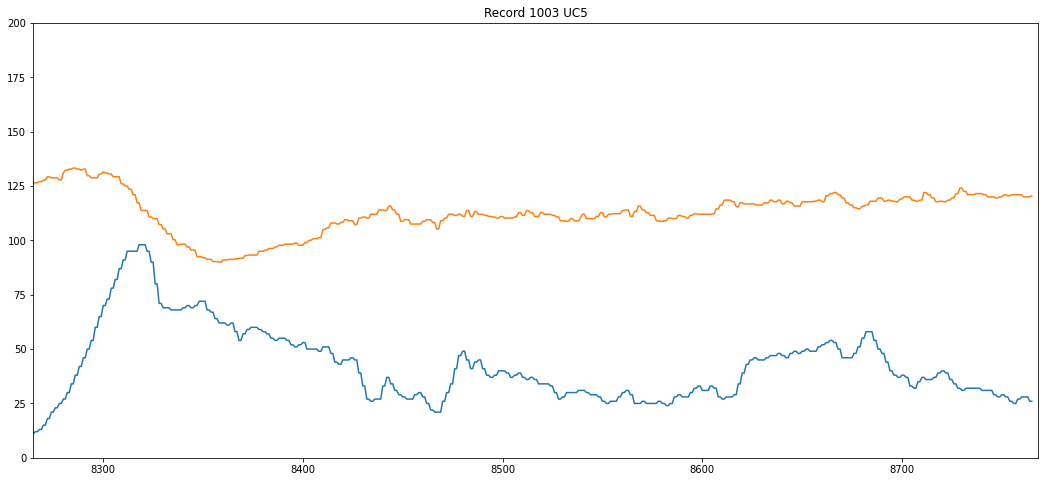

In [24]:
rec1001.plotUC(5)

In [10]:
rec1001.acc

{'ACC1': [3313, 3735]}

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
uc = rec1001._signalDf['UC']
fhr = rec1001._signalDf['FHR']
# uc.interpolate(method='spline', order=3)
# uc


In [ ]:
uc.last_valid_index()

In [ ]:
fhr.iloc[19017]

In [ ]:
uc.iloc[14938]

In [ ]:
rec1018._signalDf

In [ ]:

rec1018._signalDf['UC'] = pd.Series(np.interp(np.flatnonzero(t), np.flatnonzero(~t), uc[~t]))

In [ ]:
rec1018._signalDf

In [ ]:
rec1001.plotUC(2)

In [ ]:
rec1018.clearImages()

In [ ]:
rec1018.saveImages()

In [ ]:
record_nums = map(lambda x: x[-8:-4], os.listdir("../../data/annotations/csv"))
img_dirs = list(map(lambda x: x[-4:], glob.glob(f'../../data/images/*', recursive=False)))

In [ ]:
for rec in record_nums:
    if rec in img_dirs:
        record = Record(rec)
        record.clearImages()
        record.saveImages()
        del record